In [1]:
from climada_petals.hazard import CoastalFlood

This notebook shows how to generate coastal floods from the Aqueduct project (http://wri-projects.s3.amazonaws.com/AqueductFloodTool/download/v2/index.html). Aqueduct provides flood data across RCPs, years and return periods. This example shows how to load historical floods for Italy.

Load coastal flood data:

In [2]:
rcp='historical'
target_year='hist'
return_periods=[2, 5, 10, 25, 50, 100, 250, 500, 1000]

cf = CoastalFlood().from_aqueduct_tif(rcp=rcp,
                                      target_year=target_year,
                                      return_periods=return_periods,
                                      countries='ITA')

2023-11-23 11:49:52,579 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp1000_0.tif
2023-11-23 11:49:52,822 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp1000_0.tif
2023-11-23 11:49:54,946 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0500_0.tif
2023-11-23 11:49:55,178 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0500_0.tif
2023-11-23 11:49:57,361 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0250_0.tif
2023-11-23 11:49:57,562 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0250_0.tif
2023-11-23 11:49:59,68

<GeoAxes: title={'center': 'CF max intensity at each point'}>

/Users/aciullo/opt/anaconda3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/aciullo/opt/anaconda3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


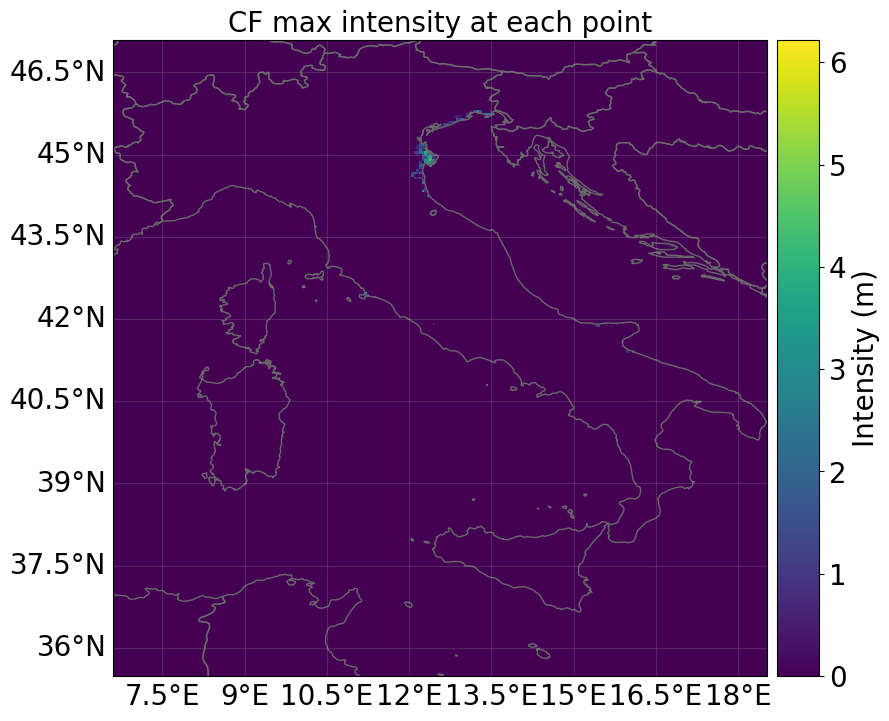

In [5]:
cf.plot_intensity(event=0)